## 연비(MPG) 예측하기 

In [1]:
import seaborn as sns # 시각화 라이브러리 
import pandas as pd # Dataframe 라이브러리
import numpy as np # 수치계산 라이브러리 

# seaborn 에서 제공하는 기본데이터셋을 불러오겠다. 그 중 'mpg' (연비) 
df = sns.load_dataset('mpg')

In [7]:
df = df.drop(['name'],axis=1)

In [15]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa


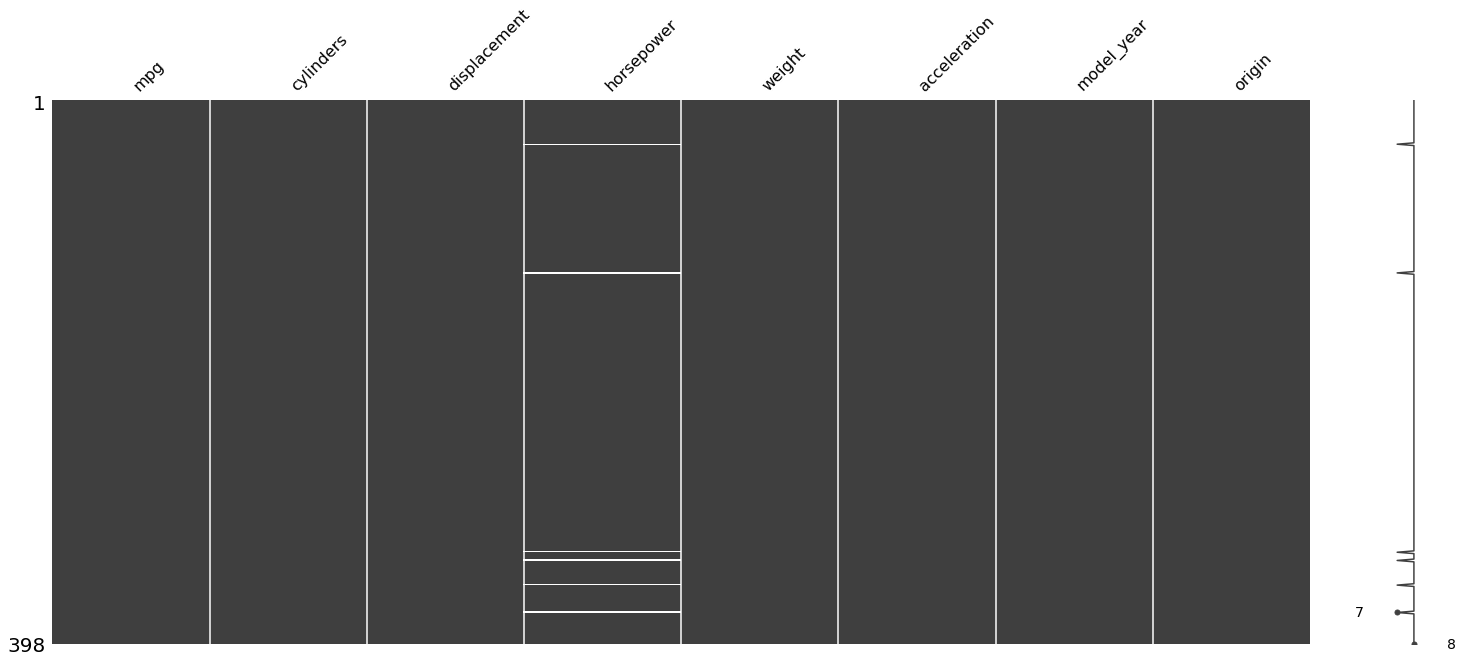

In [9]:
# 결측치 값 확인 
import missingno as msno 
msno.matrix(df)

## 전처리 

In [12]:
# horsepower 체우기 
중앙값 = df['horsepower'].median()
df['horsepower']  = df['horsepower'].fillna(중앙값)

In [16]:
# 인코딩: 문자열 --> 수치형 
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder() # 인코더를 정의 
# 변환후 데이터프레임에 넣어주기 
df['origin'] = encoder.fit_transform(df['origin'])

In [18]:
X = df.drop(['mpg'], axis=1)
y = df['mpg']

In [19]:
# standar scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # 패키지 정의 
X_scaled = scaler.fit_transform(X)

## 모델링

<div class="alert alert-success" data-title="">
  <h2><i class="fa fa-tasks" aria-hidden="true"></i> train_test_split
  </h2>
</div>

```python
from sklearn.model_selection import train_test_split
```

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y )

In [ ]:
from sklearn.linear_model import SGDRegressor
model = SGDRegressor().fit(X_train, y_train)

## 평가

In [23]:
model.score(X_test,y_test) # 회귀 이므로 R2 

0.8013379212906799